In [1]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torchvision.models import *
from skimage.transform import rescale

### 目標：預測所有未知圖片
流程：
1. 將所有圖片輸入
2. 輸入模型
3. 將每張圖片放入模型中
4. 將預測出來的圖片輸出

In [2]:
# Step1. 將所有圖片輸入
zipPredData = zipfile.ZipFile("Public_Image.zip")
predImage_name = zipPredData.namelist()
predImages = [plt.imread(zipPredData.open(i)) for i in predImage_name]

In [3]:
predImages.__len__()

131

In [4]:
predImages[0].shape

(942, 1716, 3)

In [3]:
# Step2. 輸入模型
model = torch.load("Model//segmentation_UnetPlusPlus_xception_928_1696_20220518_Augumentation.pth").cpu()

In [4]:
# Step3. 把每張圖片放入模型中
predImages = [(cv2.resize(i / 255, (1696, 928))).transpose((2, 0, 1)) for i in predImages]
# predImages = [(cv2.resize(np.array([rescale(one_channel_image, 0.5) for one_channel_image in i.transpose((2, 0, 1))]).transpose((1, 2, 0)), (864, 480)) ).transpose((2, 0, 1)) for i in predImages]
torch_predImages = [torch.from_numpy(i).unsqueeze(0).float() for i in predImages]

In [7]:
torch_predImages.size()

AttributeError: 'list' object has no attribute 'size'

In [21]:
for one_image_name, one_image in zip(predImage_name_submit, torch_predImages):
    yhat = model(one_image)
    yhat_sigmoid = torch.where(yhat.sigmoid() > 0.5, 1.0, 0.0)
    array_yhat = yhat_sigmoid.detach().numpy().transpose((0, 2, 3, 1))[0, :, :, :]
    Resize_yhat = cv2.resize(array_yhat, (1716, 942))
    cv2.imwrite(f"predImages//{one_image_name}", np.where(Resize_yhat * 255 > 150, 255, 0).astype(np.uint8))

In [17]:
yhat_sigmoid = torch.where(yhat.sigmoid() > 0.5, 1.0, 0.0)

In [18]:
array_yhat = yhat_sigmoid.detach().numpy().transpose((0, 2, 3, 1))[0, :, :, :]

In [19]:
cv2.resize(array_yhat[:, :, 0], dsize = (1716, 942)).shape

(942, 1716)

In [ ]:
yhat1 = [model(i) for i in torch_predImages[:65]]
# yhat2 = [model(i) for i in torch_predImages[65:]]

In [11]:
# 預測後圖片取 sigmoid 後，先乘以 255，然後判斷大於 150 則為有標註、其餘則沒標註
yhat_sigmoid = yhat.sigmoid()
yhat_sigmoid.size()

torch.Size([131, 1, 480, 864])

In [13]:
array_yhat = yhat_sigmoid.detach().numpy().transpose((0, 2, 3, 1))


In [14]:
Resize_yhat = [cv2.resize(rescale(i[:, :, 0], 1.5), dsize = (1716, 942)) for i in array_yhat]

In [16]:
np.unique(Resize_yhat[0])

array([0.0000000e+00, 7.1087871e-41, 1.8515497e-40, ..., 9.9999988e-01,
       9.9999994e-01, 1.0000000e+00], dtype=float32)

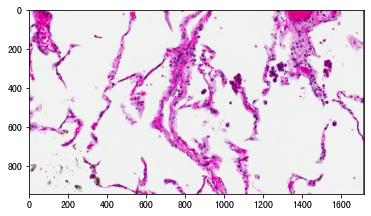

In [23]:
plt.imshow(predImages[40])
plt.show()

In [36]:
np.unique(Resize_yhat[40])

array([0.0000000e+00, 1.3778968e-41, 1.6466658e-41, ..., 9.9999988e-01,
       9.9999994e-01, 1.0000000e+00], dtype=float32)

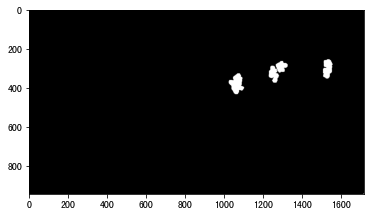

In [17]:
plt.imshow(np.where(Resize_yhat[40] * 255 > 0.005, 255, 0).astype(np.uint8), cmap = "gray")
plt.show()

In [5]:
predImage_name_submit = [i.split("/")[-1].replace(".jpg", ".png") for i in predImage_name]

In [19]:
for one_image_name, one_image in zip(predImage_name_submit, Resize_yhat):
#     tempImage = cv2.resize(one_image, (1716, 942))
    cv2.imwrite(f"predImages//{one_image_name}", np.where(one_image * 255 > 150, 255, 0).astype(np.uint8))

In [55]:
one_image

array([[0.5000214 , 0.5000148 , 0.5000033 , ..., 0.5000018 , 0.5000075 ,
        0.50001085],
       [0.5000007 , 0.5000005 , 0.5000001 , ..., 0.50000006, 0.50000024,
        0.50000036],
       [0.5000004 , 0.50000024, 0.50000006, ..., 0.5       , 0.5       ,
        0.50000006],
       ...,
       [0.50000006, 0.5       , 0.50000006, ..., 0.5       , 0.5       ,
        0.5       ],
       [0.50000024, 0.5000001 , 0.5       , ..., 0.50000006, 0.5000001 ,
        0.5000002 ],
       [0.5000068 , 0.5000047 , 0.5000011 , ..., 0.5000011 , 0.50000477,
        0.5000069 ]], dtype=float32)